<a href="https://colab.research.google.com/github/varunkr24/Capstone-Project/blob/Python/Capstone_Project_CV2_Group_2_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - CV2 (Group 2)
## Object Detection - CAR
### DOMAIN: Automotive. Surveillance.
#### CONTEXT:
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of the car, type, colour, number plates etc.
#### DATA DESCRIPTION:
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.
#### Data description:
‣ Train Images: Consists of real images of cars as per the make and year of the car.
‣ Test Images: Consists of real images of cars as per the make and year of the car.
‣ Train Annotation: Consists of bounding box region for training images.
‣ Test Annotation: Consists of bounding box region for testing images.
Dataset has been attached along with this project. Please use the same for this capstone project.
Dataset: https://drive.google.com/drive/folders/1y6JWx2CpsOuka00uePe72jNgr7F9sK45?usp=sharing
Original dataset link for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder
Reference: 3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.
#### PROJECT OBJECTIVE: 
Design a DL based car identification model.

# Milestone 1

##Step 1: Import the data

###Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage.transform import resize
from skimage.io import imread
import random
from os import path
#from google.colab import drive
import cv2
import random

### Mount drive

In [2]:
#drive.mount('/content/drive')

In [3]:
 import zipfile
 zip_ref = zipfile.ZipFile("Annotations.zip", 'r')
 zip_ref.extractall()
 zip_ref.close()

In [4]:
 import zipfile
 zip_ref = zipfile.ZipFile("Car Images.zip", 'r')
 zip_ref.extractall()
 zip_ref.close()

### Set data path

In [5]:
#DATA_SET_PATH = "C:/trials/Capstone project/"
ANNOTATION_PATH = "Annotations/"
TRAIN_IMAGES_DIR_PATH = "Car Images/Train Images/"
TEST_IMAGES_DIR_PATH = "Car Images/Test Images/"

In [6]:
"""
DATA_SET_PATH = "/content/drive/MyDrive/Great Learning/Cap/Dataset/"
ANNOTATION_PATH = DATA_SET_PATH + "Annotations/"
TRAIN_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Train Images/"
TEST_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Test Images/"
"""

'\nDATA_SET_PATH = "/content/drive/MyDrive/Great Learning/Cap/Dataset/"\nANNOTATION_PATH = DATA_SET_PATH + "Annotations/"\nTRAIN_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Train Images/"\nTEST_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Test Images/"\n'

###Load *Car names and make* data

In [7]:
car_makes_df = pd.read_csv("Car names and make.csv", header=None, names=["car_make"]) 

In [8]:
car_makes_df

car_make
0          AM General Hummer SUV 2000
1                 Acura RL Sedan 2012
2                 Acura TL Sedan 2012
3                Acura TL Type-S 2008
4                Acura TSX Sedan 2012
..                                ...
191  Volkswagen Beetle Hatchback 2012
192          Volvo C30 Hatchback 2012
193              Volvo 240 Sedan 1993
194               Volvo XC90 SUV 2007
195     smart fortwo Convertible 2012

[196 rows x 1 columns]

In [9]:
car_makes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_make  196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


- There are no nulls
- There are 196 car models

###Load Annotations Data

In [10]:
car_annotations_train = pd.read_csv(ANNOTATION_PATH + "Train Annotations.csv")
car_annotations_test = pd.read_csv(ANNOTATION_PATH + "Test Annotation.csv")

In [11]:
car_annotations_train

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0     00001.jpg                        39         116         569         375   
1     00002.jpg                        36         116         868         587   
2     00003.jpg                        85         109         601         381   
3     00004.jpg                       621         393        1484        1096   
4     00005.jpg                        14          36         133          99   
...         ...                       ...         ...         ...         ...   
8139  08140.jpg                         3          44         423         336   
8140  08141.jpg                       138         150         706         523   
8141  08142.jpg                        26         246         660         449   
8142  08143.jpg                        78         526        1489         908   
8143  08144.jpg                        20         240         862         677   

      Image class  
0              14  
1               3  
2              91  
3             134  
4             106  
...           ...  
8139           78  
8140          196  
8141          163  
8142          112  
8143           17  

[8144 rows x 6 columns]

In [12]:
car_annotations_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8144 non-null   object
 1   Bounding Box coordinates  8144 non-null   int64 
 2   Unnamed: 2                8144 non-null   int64 
 3   Unnamed: 3                8144 non-null   int64 
 4   Unnamed: 4                8144 non-null   int64 
 5   Image class               8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


car_annotations_train data has 6 features with no null/missing value.    
Bounding Box coordinates, Unnamed: 2, Unnamed: 3, Unnamed: 4 are x1, y1, x2, y2 coordinates respectively  

In [13]:
car_annotations_test

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0     00001.jpg                        30          52         246         147   
1     00002.jpg                       100          19         576         203   
2     00003.jpg                        51         105         968         659   
3     00004.jpg                        67          84         581         407   
4     00005.jpg                       140         151         593         339   
...         ...                       ...         ...         ...         ...   
8036  08037.jpg                        49          57        1169         669   
8037  08038.jpg                        23          18         640         459   
8038  08039.jpg                        33          27         602         252   
8039  08040.jpg                        33         142         521         376   
8040  08041.jpg                        77          73         506         380   

      Image class  
0             181  
1             103  
2             145  
3             187  
4             185  
...           ...  
8036           63  
8037           16  
8038           17  
8039           38  
8040           32  

[8041 rows x 6 columns]

In [14]:
car_annotations_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8041 non-null   object
 1   Bounding Box coordinates  8041 non-null   int64 
 2   Unnamed: 2                8041 non-null   int64 
 3   Unnamed: 3                8041 non-null   int64 
 4   Unnamed: 4                8041 non-null   int64 
 5   Image class               8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


car_annotations_test data has 6 features with no null/missing value.    
Bounding Box coordinates, Unnamed: 2, Unnamed: 3, Unnamed: 4 are x1, y1, x2, y2 coordinates respectively  

### Display images class and respective number of images
##### Use pd.option_context to display maximum rows

In [15]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(pd.DataFrame(car_annotations_train['Image class']).value_counts())

Image class
119            68
79             49
161            48
167            48
144            47
56             47
98             46
171            46
162            46
191            46
20             46
182            46
95             46
43             46
112            46
194            46
153            45
147            45
44             45
179            45
53             45
123            45
59             45
121            45
65             45
73             45
72             45
148            45
115            45
114            45
81             45
82             45
109            45
107            45
1              45
165            45
6              45
8              45
34             45
24             45
187            44
160            44
188            44
164            44
74             44
75             44
76             44
85             44
89             44
16             44
94             44
170            44
151            44
105            44
108            4

Image class - 119 has maximum 68 images and Image class - 136 has minimum 24 images

####Visualize train images and test images datasets

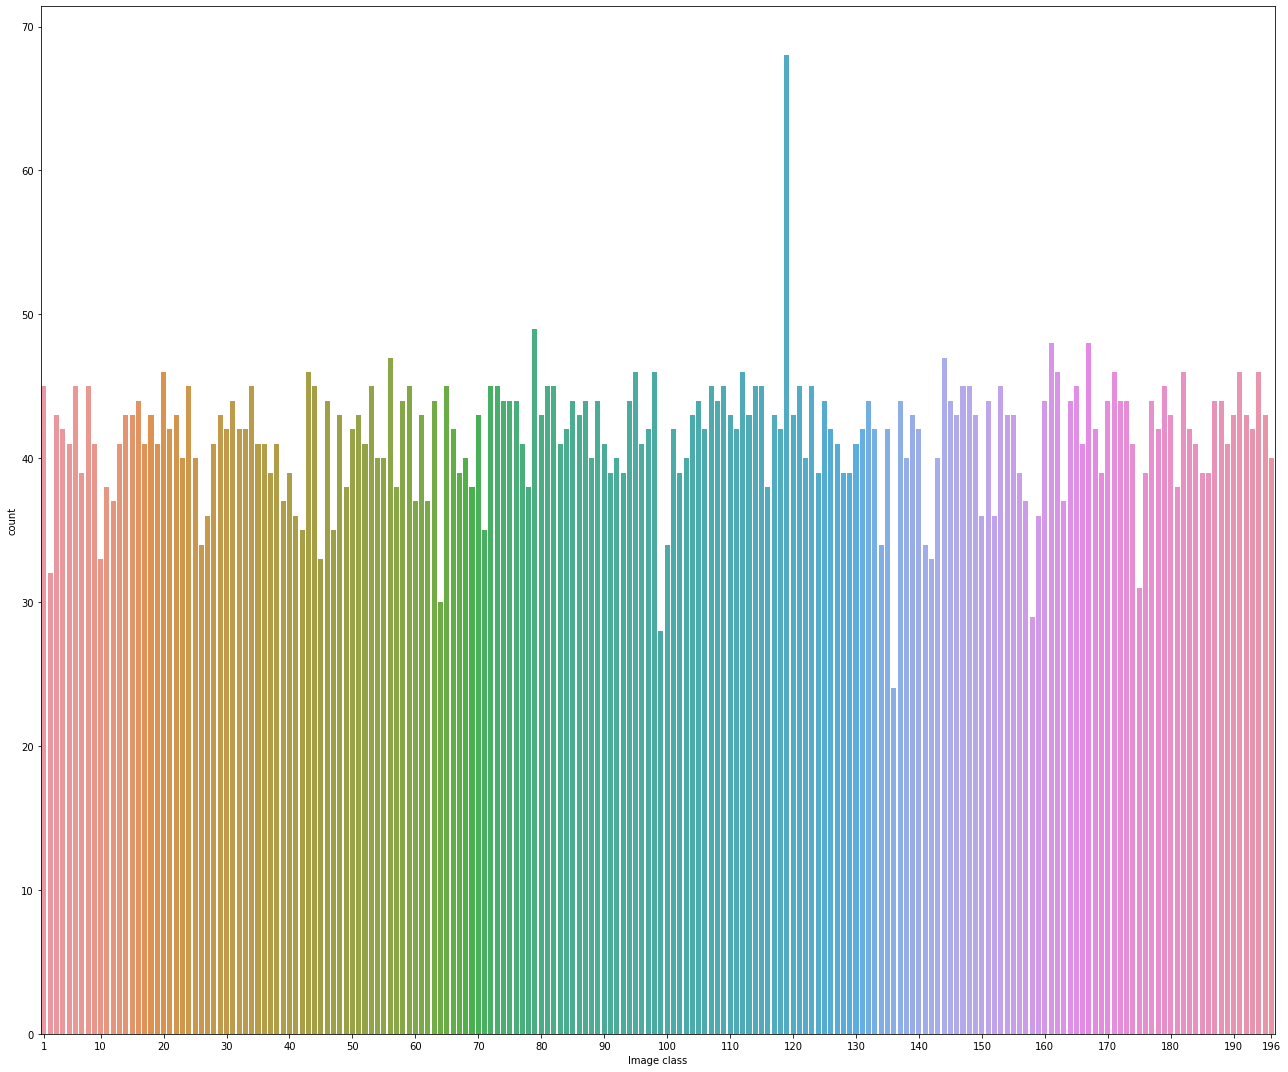

In [16]:
#%matplotlib inline
plt.subplots(figsize=(18,15))
ax = sns.countplot(data = car_annotations_train, x = car_annotations_train['Image class'] )
ax.set_xticks([0, 9,19,29,39,49,59,69,79,89,99,109,119,129,139,149,159,169,179,189,195] )
ax.set_xticklabels([1, 10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,196])
plt.tight_layout()
plt.show()

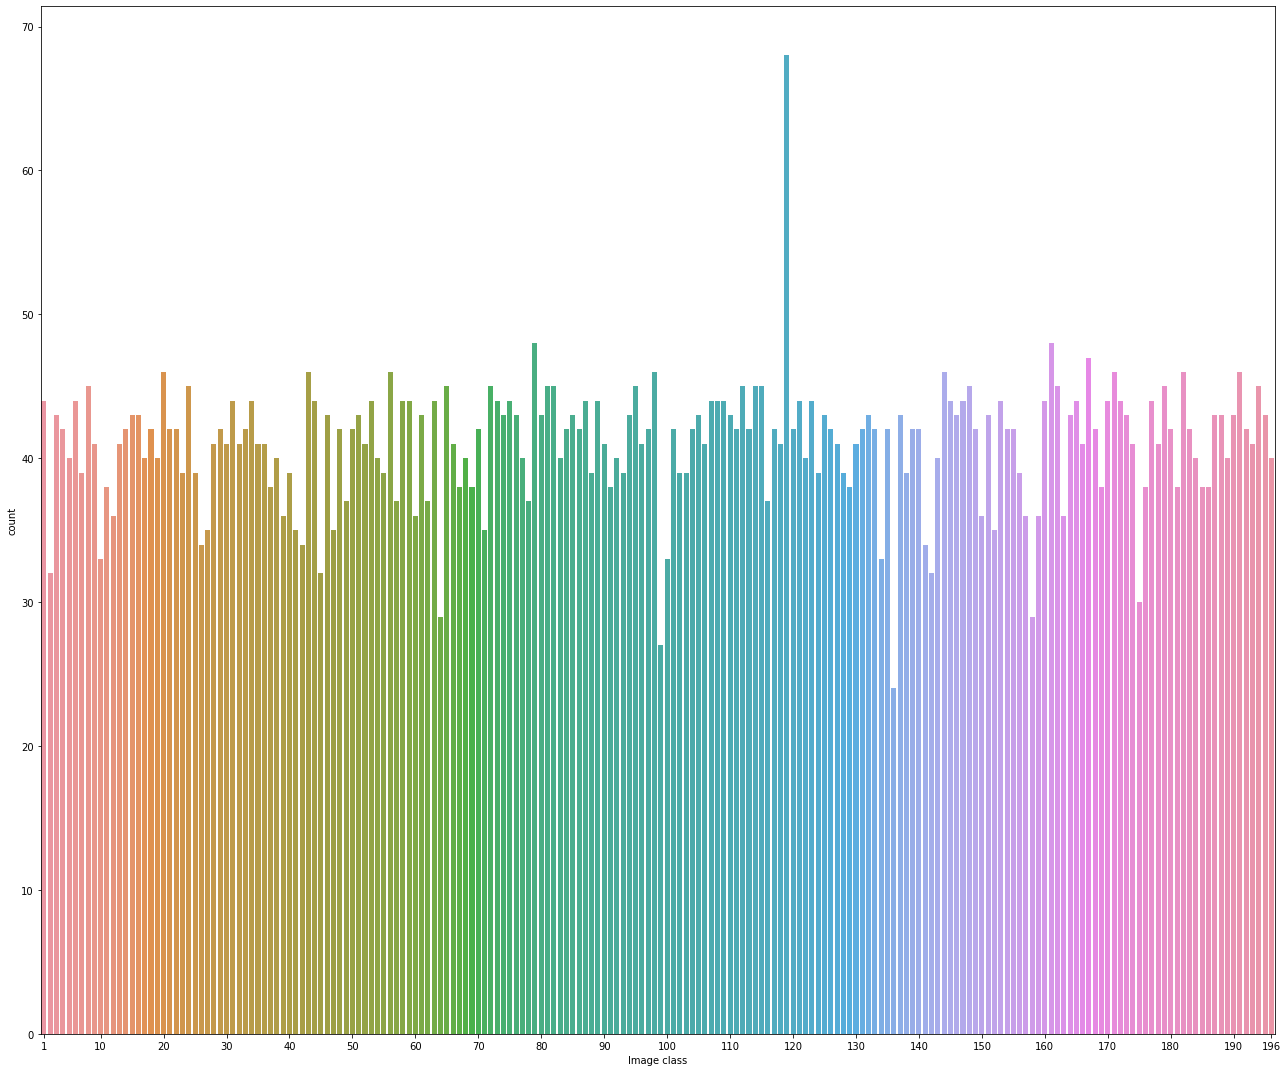

In [17]:
plt.subplots(figsize=(18,15))
ax = sns.countplot(data = car_annotations_test, x = car_annotations_test['Image class'] )
ax.set_xticks([0, 9,19,29,39,49,59,69,79,89,99,109,119,129,139,149,159,169,179,189,195] )
ax.set_xticklabels([1, 10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,196])
plt.tight_layout()
plt.show()

In Test Images, Image class - 119 has maximum images and Image class - 136 has minimum images

##Step 2: Map training and testing images to its classes.

####Custom function to create dataframe that contains Image Name, Full path of the image and Image class

In [18]:
def load_image_paths_and_map_class(car_makes, dir_path, df_annotations):
  data = []
  for car_make in car_makes:
    img_path =  dir_path + car_make
    if os.path.exists(img_path):
      for img in os.listdir(img_path):
        data.append([img, img_path + "/" +img, df_annotations[df_annotations["Image Name"]==img]["Image class"].values[0]])
  return pd.DataFrame(data, columns=["Image Name", "FullPath", "Image Class"])

In [19]:
train_images_path = load_image_paths_and_map_class(car_makes_df.car_make.values, TRAIN_IMAGES_DIR_PATH, car_annotations_train)
test_images_path = load_image_paths_and_map_class(car_makes_df.car_make.values, TEST_IMAGES_DIR_PATH, car_annotations_test)

Image Name, Image path and Image class are stored in train_images_path and test_images_path

In [20]:
print("Total Training Images:", len(train_images_path))
print("Total Testing Images:", len(test_images_path))

Total Training Images: 8103
Total Testing Images: 8000


#### Display train_images_path dataframe

In [21]:
train_images_path.head()

Image Name                                           FullPath  Image Class
0  00163.jpg  Car Images/Train Images/AM General Hummer SUV ...            1
1  00462.jpg  Car Images/Train Images/AM General Hummer SUV ...            1
2  00522.jpg  Car Images/Train Images/AM General Hummer SUV ...            1
3  00707.jpg  Car Images/Train Images/AM General Hummer SUV ...            1
4  00773.jpg  Car Images/Train Images/AM General Hummer SUV ...            1

####Check image shape

In [22]:
print("Image path:", train_images_path.iloc[0,1])
print("Image shape:", cv2.imread(train_images_path.iloc[0,1]).shape)

Image path: Car Images/Train Images/AM General Hummer SUV 2000/00163.jpg
Image shape: (525, 700, 3)


In [23]:
print("Image path:", train_images_path.iloc[1,1])
print("Image shape:", cv2.imread(train_images_path.iloc[1,1]).shape)

Image path: Car Images/Train Images/AM General Hummer SUV 2000/00462.jpg
Image shape: (64, 85, 3)


In [24]:
print("Image path:", train_images_path.iloc[2,1])
print("Image shape:", cv2.imread(train_images_path.iloc[2,1]).shape)

Image path: Car Images/Train Images/AM General Hummer SUV 2000/00522.jpg
Image shape: (71, 94, 3)


It can be noted that shape/resolution of images are not identical.

#### Custom function to display random images along with respective class

In [25]:
def plot_random_cars(car_makes, images_path, is_export=False):
  export_paths = {}
  for car_make_idx in range(5):
      imageClass = random.randrange(0, len(car_makes_df))
      print(car_makes.iloc[imageClass].values[0])
      plt.figure(figsize=(15,12))
      for i in range(5):
        df = images_path[images_path["Image Class"]==imageClass]
        if len(df) > 0:
          idx = random.randrange(0, len(df))
          plt.subplot(5, 5, i+1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          plt.imshow(imread(df.iloc[idx].FullPath))
      if is_export:
        p = str(imageClass) + "_class.png"
        plt.savefig(p)
        export_paths[car_makes.iloc[imageClass].values[0]] = p
      plt.show()
  return export_paths

In [26]:
car_makes_df.head()

car_make
0  AM General Hummer SUV 2000
1         Acura RL Sedan 2012
2         Acura TL Sedan 2012
3        Acura TL Type-S 2008
4        Acura TSX Sedan 2012

####Display train images along with its class

Audi S6 Sedan 2011


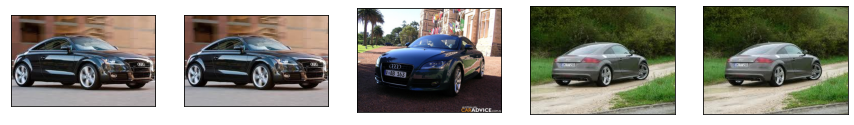

Audi S5 Coupe 2012


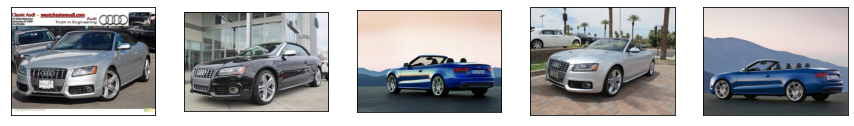

Aston Martin V8 Vantage Convertible 2012


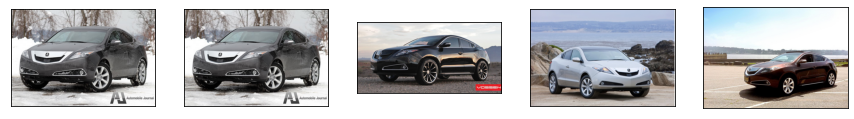

BMW Z4 Convertible 2012


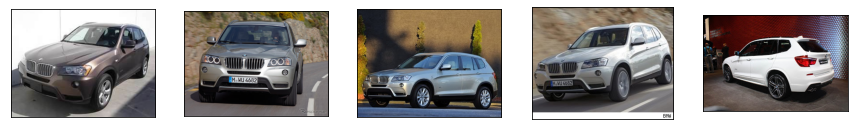

Jaguar XK XKR 2012


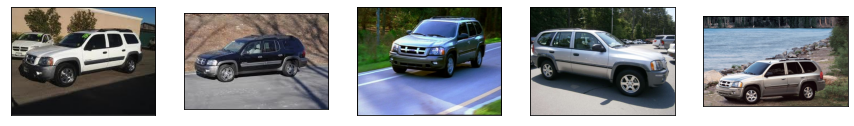

{}

In [27]:
plot_random_cars(car_makes_df, train_images_path)

####Display Test images along with its class

Chrysler Sebring Convertible 2010


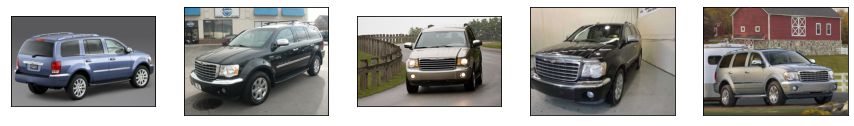

Chevrolet Corvette Ron Fellows Edition Z06 2007


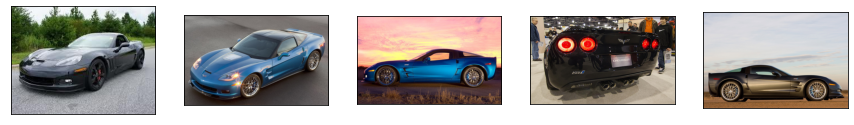

Audi S5 Convertible 2012


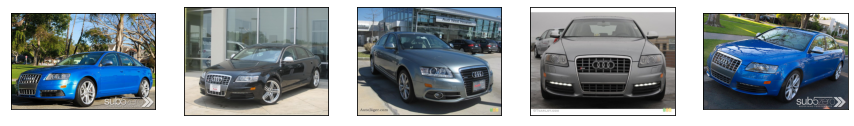

Chevrolet Corvette Ron Fellows Edition Z06 2007


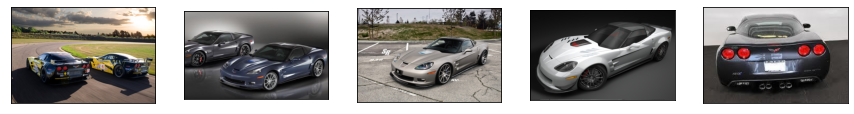

Chevrolet Silverado 1500 Classic Extended Cab 2007


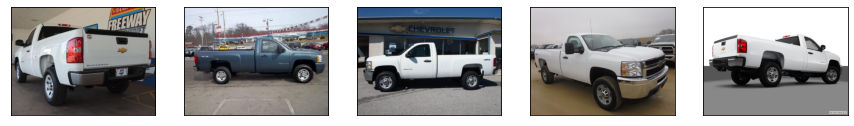

{}

In [28]:
plot_random_cars(car_makes_df, test_images_path)

###Image Augmentation using Img_Aug library

In [29]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import glob

####Augment training images

In [30]:
augmented_img = []
labels = []

for imgfolder in os.listdir(TRAIN_IMAGES_DIR_PATH):
  imgpath = TRAIN_IMAGES_DIR_PATH + imgfolder
  for img in glob.glob(imgpath + '/' + '*.jpg'):
    image = imageio.imread(img, pilmode="RGB")
    resize_image = iaa.Resize(224)
    image = resize_image.augment_image(image)
    augmented_img.append(image) ### image resized to 224 and appended ## actual image 
    labels.append(imgfolder) ### label appended
    
    #rotation 10
    rotate=iaa.Affine(rotate=(10))
    rotated_image=rotate.augment_image(image)
    augmented_img.append(rotated_image)
    labels.append(imgfolder)

    #rotation 20
    rotate=iaa.Affine(rotate=(20))
    rotated_image=rotate.augment_image(image)
    augmented_img.append(rotated_image)
    labels.append(imgfolder)

    #rotation 40
#     rotate=iaa.Affine(rotate=(40))
#     rotated_image=rotate.augment_image(image)
#     augmented_img.append(rotated_image)
#     labels.append(imgfolder)
    
    #Add gaussian_noise
    gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
    noise_image=gaussian_noise.augment_image(image)
    augmented_img.append(noise_image)
    labels.append(imgfolder)

    gaussian_noise=iaa.AdditiveGaussianNoise(20,30)
    noise_image=gaussian_noise.augment_image(image)
    augmented_img.append(noise_image)
    labels.append(imgfolder)

#     gaussian_noise=iaa.AdditiveGaussianNoise(30,40)
#     noise_image=gaussian_noise.augment_image(image)
#     augmented_img.append(noise_image)
#     labels.append(imgfolder)
    
    #Crop images
    crop = iaa.Crop(percent=(0.1)) # crop image
    crop_image=crop.augment_image(image)
    augmented_img.append(crop_image)
    labels.append(imgfolder)

    #shear
    shear = iaa.Affine(shear=(20,30))
    shear_image=shear.augment_image(image)
    augmented_img.append(shear_image)
    labels.append(imgfolder)

    shear = iaa.Affine(shear=(0,10))
    shear_image=shear.augment_image(image)
    augmented_img.append(shear_image)
    labels.append(imgfolder)

    shear = iaa.Affine(shear=(10,20))
    shear_image=shear.augment_image(image)
    augmented_img.append(shear_image)
    labels.append(imgfolder)

    #flip_hr=iaa.Flipud(p=1.0)
    #flip_hr_image= flip_hr.augment_image(image)
    #augmented_img.append(flip_hr_image)
    #labels.append(imgfolder)
    
    #Contrast
    contrast=iaa.GammaContrast(gamma=2.0)
    contrast_image =contrast.augment_image(image)
    augmented_img.append(contrast_image)
    labels.append(imgfolder)

    #Scale images
    scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
    scale_image =scale_im.augment_image(image)
    augmented_img.append(scale_image)
    labels.append(imgfolder)


C:\Users\ssdrive\AppData\Local\Temp\ipykernel_2080\158018309.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(img, pilmode="RGB")


###Test images resized to 224, No augmentation

In [31]:
augmented_img_test = []
labels_test = []

for imgfolder in os.listdir(TEST_IMAGES_DIR_PATH):
  imgpath = TEST_IMAGES_DIR_PATH + imgfolder
  for img in glob.glob(imgpath + '/' + '*.jpg'):
    image = imageio.imread(img,pilmode="RGB")
    resize_image = iaa.Resize(224)
    image = resize_image.augment_image(image)
    augmented_img_test.append(image)
    labels_test.append(imgfolder)

C:\Users\ssdrive\AppData\Local\Temp\ipykernel_2080\3694155021.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(img,pilmode="RGB")


In [32]:
## Convert to numpy array

augmented_img_test = np.array(augmented_img_test)
labels_test = np.array(labels_test)

augmented_img = np.array(augmented_img)
labels = np.array(labels)

In [33]:
## Apply label encoder on labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(labels)
labels_enc = le.transform(labels)

le = LabelEncoder()

le.fit(labels_test)
labels_test_enc = le.transform(labels_test)

####Check shape and length of augmented images

In [34]:
augmented_img[0].shape,augmented_img[24].shape, np.array(augmented_img).shape, len(labels)

((224, 224, 3), (224, 224, 3), (89584, 224, 224, 3), 89584)

####Display augmented images

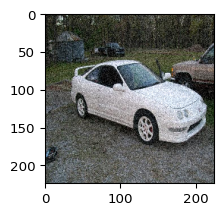

In [35]:
ia.imshow(augmented_img[3])

####Check number of images in each class after augmentation

In [36]:
pd.DataFrame(labels_enc).value_counts()

119    748
75     539
160    528
166    528
143    517
      ... 
175    341
59     330
157    319
98     308
129    264
Length: 196, dtype: int64

####Feed augmentated images to ImageDataGenerator and rescale



In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout

In [38]:
train_datagen_temp = ImageDataGenerator(rescale=1.0/255)
test_datagen_temp = ImageDataGenerator(rescale=1.0/255)


train_generator_temp = train_datagen_temp.flow(augmented_img,labels_enc, batch_size=10)
test_generator_temp = test_datagen_temp.flow(augmented_img_test, labels_test_enc, batch_size=10)

##Step 3: Map training and testing images to its annotations. 


####Custom function to map images to its annotations

In [39]:
def plot_random_cars_with_bounding_box(car_makes, images_path, annotations, is_export=False):
  export_paths = {}
  for car_make_idx in range(5):
      imageClass = random.randrange(0, len(car_makes_df))
      print(car_makes.iloc[imageClass].values[0])
      plt.figure(figsize=(15,12))
      for i in range(3):
        df = images_path[images_path["Image Class"]==imageClass]
        if len(df) > 0:
          idx = random.randrange(0, len(df))
          plt.subplot(3, 3, i+1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          img = imread(df.iloc[idx].FullPath)
          ann = annotations[annotations["Image Name"] == df.iloc[idx]["Image Name"]]
          x1,y1,x2,y2 = ann['Bounding Box coordinates'].values[0], ann['Unnamed: 2'].values[0], ann['Unnamed: 3'].values[0], ann['Unnamed: 4'].values[0]
          cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2) # add rectangle to image
          plt.imshow(img)
      if is_export:
        p = str(imageClass) + "_bb.png"
        plt.savefig(p)
        export_paths[car_makes.iloc[imageClass].values[0]] = p
      plt.show()
  return export_paths

##Step 4: Display images with bounding box

####Draw bounding box on Train Images

Plymouth Neon Coupe 1999


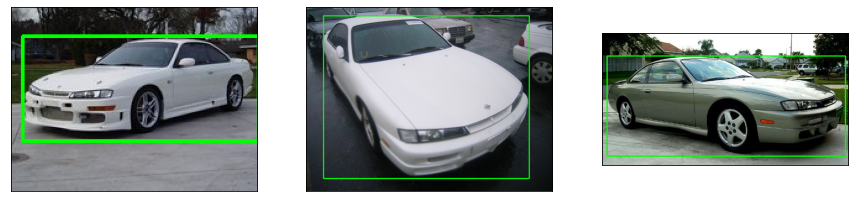

Geo Metro Convertible 1993


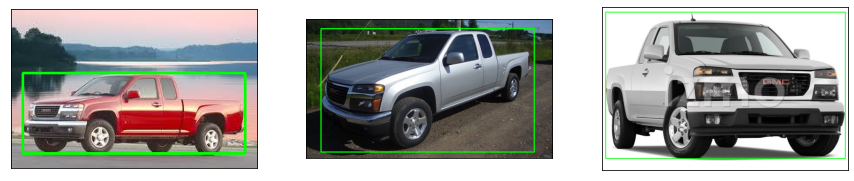

Volkswagen Beetle Hatchback 2012


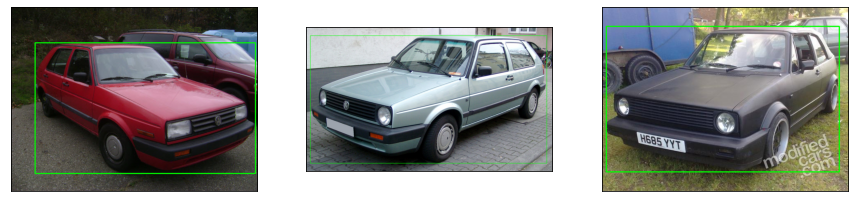

Mercedes-Benz S-Class Sedan 2012


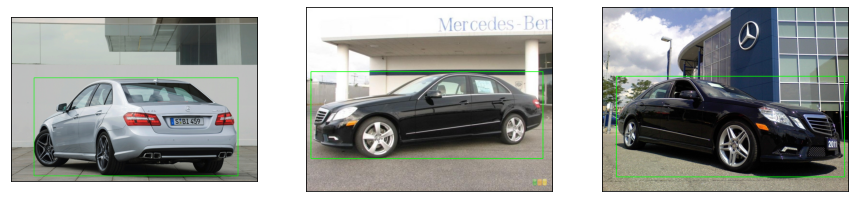

Acura RL Sedan 2012


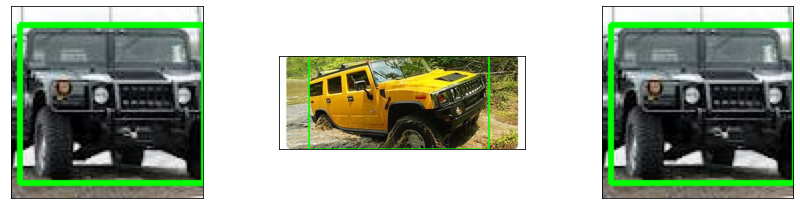

{}

In [40]:
plot_random_cars_with_bounding_box(car_makes_df, train_images_path, car_annotations_train)

####Draw Bounding Box on Test Images

Audi RS 4 Convertible 2008


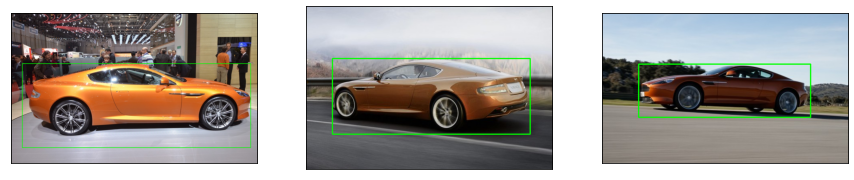

Chevrolet Avalanche Crew Cab 2012


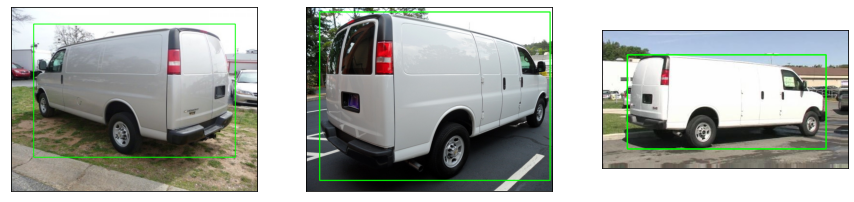

Dodge Charger Sedan 2012


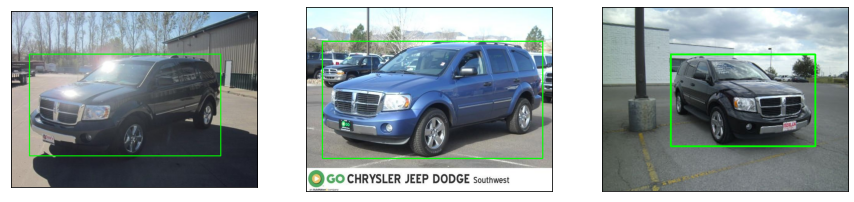

Volkswagen Golf Hatchback 2012


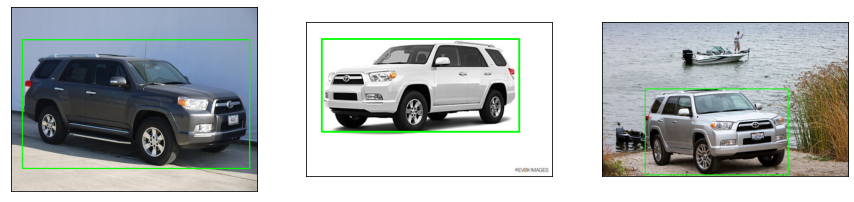

Jeep Compass SUV 2012


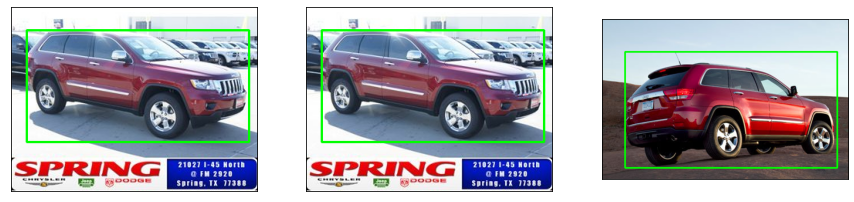

{}

In [41]:
plot_random_cars_with_bounding_box(car_makes_df, test_images_path,car_annotations_test)

#### Output: 
Images mapped to its class and annotation ready to be used for deep learning

#Milestone 2

## Classification Model

#### Import libraries & define parameters

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout

Image_Size = 224
Batch_Size = 32
Epochs = 10

#### Define Callbacks

In [43]:
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint

#model checkpoint to save the model after every epoch
SavePath = "models/ResNetModel_weights.{epoch:02d}.hdf5"
model_checkpoint = ModelCheckpoint(
    filepath=SavePath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='auto')

lr_schedule = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/2)) # change learning rate from 1e-8 to 1e-3

Redlr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)

In [44]:
#os.chdir('/content/drive/MyDrive/Great Learning/Cap')

### Data Generator w/o Augmentation

Load the image during training using flow from directory function

In [45]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAIN_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=Batch_Size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(TEST_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=Batch_Size, class_mode='categorical')


Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


### MobileNet Model

In [46]:
from tensorflow.keras.applications.mobilenet import MobileNet

base_model = MobileNet(input_shape=(Image_Size, Image_Size, 3), include_top=False)

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x) #average pooling of the last feature extractor layer 
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(196, activation='softmax')(x) #Dense layer for 196 output class

model = Model(inputs=base_model.input, outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/10
255/255 [==============================] - 180s 703ms/step - loss: 4.5396 - accuracy: 0.0598 - val_loss: 3.5843 - val_accuracy: 0.1439
Epoch 2/10
255/255 [==============================] - 176s 692ms/step - loss: 2.9715 - accuracy: 0.2471 - val_loss: 2.8554 - val_accuracy: 0.2705
Epoch 3/10
255/255 [==============================] - 176s 691ms/step - loss: 2.1241 - accuracy: 0.4301 - val_loss: 2.3696 - val_accuracy: 0.3747
Epoch 4/10
255/255 [==============================] - 176s 692ms/step - loss: 1.5454 - accuracy: 0.5641 - val_loss: 2.2616 - val_accuracy: 0.3990
Epoch 5/10
255/255 [==============================] - 176s 692ms/step - loss: 1.1564 - accuracy: 0.6691 - val_loss: 2.1214 - val_accuracy: 0.4446
Epoch 6/10
255/255 [==============================] - 176s 690ms/step - loss: 0.8557 - accuracy: 0.7432 - val_loss: 2.1859 - val_accuracy: 0.4402
Epoch 7/10
255/255 [==============================] - 176s 691ms/step - loss: 0.6148 - accuracy: 0.8195 - val_loss: 2.2034 -

Training accuracy of 94% and test accuracy of 48% is achieved.

The model is overfitting on the training data

### Data Generator with real time augmentation

In [49]:
# We will augment the image by applying shear, zoom & horizontal flip
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.5, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAIN_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(TEST_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=32, class_mode='categorical')


Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


### MobileNet Model

In [50]:
from tensorflow.keras.applications.mobilenet import MobileNet

base_model = MobileNet(input_shape=(Image_Size, Image_Size, 3), include_top=False)

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(196, activation='softmax')(x)

MobileNet_model = Model(inputs=base_model.input, outputs=x)

MobileNet_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [51]:
MobileNet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = MobileNet_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=Epochs, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/10
255/255 [==============================] - 212s 828ms/step - loss: 4.8535 - accuracy: 0.0320 - val_loss: 4.0393 - val_accuracy: 0.0917
Epoch 2/10
255/255 [==============================] - 211s 827ms/step - loss: 3.7044 - accuracy: 0.1306 - val_loss: 3.3023 - val_accuracy: 0.1822
Epoch 3/10
255/255 [==============================] - 210s 825ms/step - loss: 3.0873 - accuracy: 0.2240 - val_loss: 2.8955 - val_accuracy: 0.2511
Epoch 4/10
255/255 [==============================] - 211s 826ms/step - loss: 2.7180 - accuracy: 0.3017 - val_loss: 2.5841 - val_accuracy: 0.3250
Epoch 5/10
255/255 [==============================] - 211s 827ms/step - loss: 2.3982 - accuracy: 0.3624 - val_loss: 2.4439 - val_accuracy: 0.3521
Epoch 6/10
255/255 [==============================] - 210s 825ms/step - loss: 2.1887 - accuracy: 0.4091 - val_loss: 2.2869 - val_accuracy: 0.3809
Epoch 7/10
255/255 [==============================] - 211s 826ms/step - loss: 2.0178 - accuracy: 0.4499 - val_loss: 2.2973 -

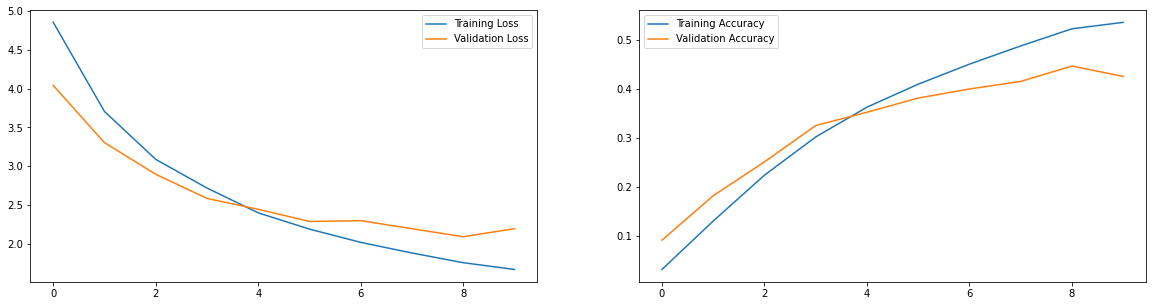

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

The training and test accuracy are in sync, we are able to reduce overfitting by using data augmentation



In [54]:
#Save the model & weights for future reference
model_json = MobileNet_model.to_json()
with open("MobileNet_model.json", "w") as file:
  file.write(model_json)

MobileNet_model.save_weights("MobileNet_model_weights.h5")

Fitting the previous model for more epochs to train the network futher

In [55]:
history = MobileNet_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/10
255/255 [==============================] - 211s 826ms/step - loss: 1.5597 - accuracy: 0.5626 - val_loss: 2.0514 - val_accuracy: 0.4569
Epoch 2/10
255/255 [==============================] - 210s 824ms/step - loss: 1.4669 - accuracy: 0.5856 - val_loss: 2.0204 - val_accuracy: 0.4677
Epoch 3/10
255/255 [==============================] - 211s 828ms/step - loss: 1.3929 - accuracy: 0.5950 - val_loss: 1.9707 - val_accuracy: 0.4803
Epoch 4/10
255/255 [==============================] - 210s 825ms/step - loss: 1.3280 - accuracy: 0.6153 - val_loss: 1.9328 - val_accuracy: 0.4864
Epoch 5/10
255/255 [==============================] - 209s 822ms/step - loss: 1.2534 - accuracy: 0.6392 - val_loss: 2.0500 - val_accuracy: 0.4829
Epoch 6/10
255/255 [==============================] - 210s 825ms/step - loss: 1.2228 - accuracy: 0.6411 - val_loss: 2.0177 - val_accuracy: 0.4819
Epoch 7/10
255/255 [==============================] - 210s 826ms/step - loss: 1.1663 - accuracy: 0.6601 - val_loss: 2.0288 -

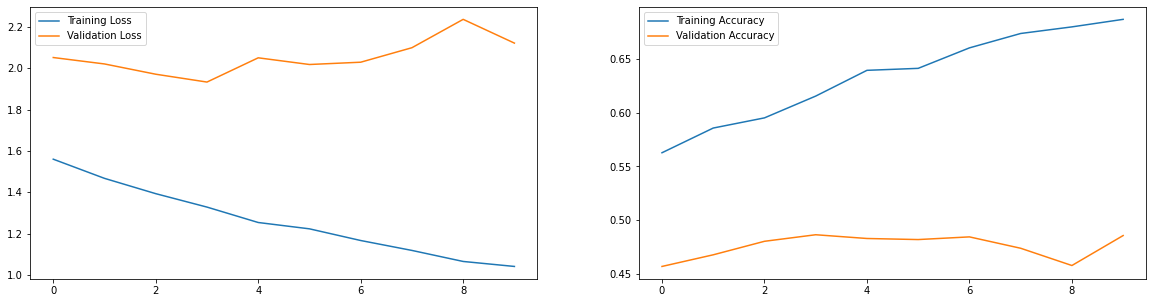

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Training accuracy increased to 70% and test accuracy increased to 50%

There is no significant improvement in the test accuracy, the accuracy tends to saturate at 50%

### ResNet 50

In [57]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(input_shape=(Image_Size, Image_Size, 3), weights='imagenet', include_top=False)

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Flatten()(x)
#x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(196, activation='softmax')(x)

ResNet_model = Model(inputs=base_model.input, outputs=x)

ResNet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [58]:
ResNet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = ResNet_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=Epochs, validation_data=test_generator, validation_steps=len(test_generator), callbacks=[lr_schedule])

Epoch 1/10
 41/255 [===>..........................] - ETA: 4:14 - loss: 5.7718 - accuracy: 0.0046

KeyboardInterrupt: 

No learning is observed by freezing the feature extraction layers and training only the classifier layers

### EfficientNet

In [60]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

base_model = EfficientNetB0(input_shape=(Image_Size, Image_Size, 3), weights='imagenet', include_top=False)

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
# x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
# x = Dense(512, activation='relu')(x)
x = Dense(196, activation='softmax')(x)

EffNet_model = Model(inputs=base_model.input, outputs=x)

EffNet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']    

 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 56, 56, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
          

                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_a

 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
          

                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_s

 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 14, 14, 112)  0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_a

                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 7, 7, 1152)  10368       ['block7a_expand_activation[0][0]
 D)       

In [61]:
EffNet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
history = EffNet_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=Epochs, validation_data=test_generator, validation_steps=len(test_generator), callbacks=[lr_schedule])

Epoch 1/10
  4/255 [..............................] - ETA: 3:21 - loss: 5.2875 - accuracy: 0.0000e+00

KeyboardInterrupt: 

No learning is observed by freezing the feature extraction layers and training only the classifier layers

In [63]:
import csv
import cv2
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input

In [64]:
IMAGE_SIZE = 128 # Image sizes can vary (96, 128, 160, 192, 224) - MobileNetV2
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128

In [65]:
data_train = pd.merge(train_images_path, car_annotations_train, how='inner',on='Image Name')

In [66]:
data_train.head(5)

Image Name                                           FullPath  Image Class  \
0  00163.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
1  00462.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
2  00522.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
3  00707.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
4  00773.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   

   Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  Image class  
0                        46          84         661         428            1  
1                         5           8          83          58            1  
2                         6           7          94          68            1  
3                        26          32         677         418            1  
4                        33          50         197         150            1

In [67]:
print(data_train.shape)

(8103, 8)


In [68]:
data_test = pd.merge(test_images_path, car_annotations_test, how='inner',on='Image Name')

In [69]:
data_test.head(5)

Image Name                                           FullPath  Image Class  \
0  00076.jpg  Car Images/Test Images/AM General Hummer SUV 2...            1   
1  00457.jpg  Car Images/Test Images/AM General Hummer SUV 2...            1   
2  00684.jpg  Car Images/Test Images/AM General Hummer SUV 2...            1   
3  01117.jpg  Car Images/Test Images/AM General Hummer SUV 2...            1   
4  01167.jpg  Car Images/Test Images/AM General Hummer SUV 2...            1   

   Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  Image class  
0                        11          13          84          60            1  
1                        31          20         226         119            1  
2                       111          54         365         190            1  
3                        45          39         729         414            1  
4                        14          16         268         169            1

In [70]:
print(data_test.shape)

(8000, 8)


### Load the data

In [71]:
y_train = np.zeros((int(data_train.shape[0]), 4))
X_train = np.zeros((int(data_train.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

# Read image, its dimensions, BBox coords for train data

for index, row in data_train.iterrows():
  path = row.iloc[1]
  x0 = int(row.iloc[3])
  y0 = int(row.iloc[4])
  x1 = int(row.iloc[5])
  y1 = int(row.iloc[6])
  with Image.open(path) as image:
    image_width, image_height = image.size
    img = cv2.resize(np.array(image), dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
  try:
    img = img[:, :, :3]
  except:
    continue
  X_train[index] = preprocess_input(np.array(img, dtype = np.float32))

  y_train[index, 0] = x0 * IMAGE_SIZE / image_width                 # Normalize bounding box by image width
  y_train[index, 1] = y0 * IMAGE_SIZE / image_height                # Normalize bounding box by image height
  y_train[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width          
  y_train[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height  

In [72]:
print(X_train.shape)
print(y_train.shape)

(8103, 128, 128, 3)
(8103, 4)


In [73]:
y_test = np.zeros((int(data_test.shape[0]), 4))
X_test = np.zeros((int(data_test.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

# Read image, its dimensions, BBox coords for test data

for index, row in data_test.iterrows():
  path = row.iloc[1]
  x0 = int(row.iloc[3])
  y0 = int(row.iloc[4])
  x1 = int(row.iloc[5])
  y1 = int(row.iloc[6])
  with Image.open(path) as image:
    image_width, image_height = image.size
    img = cv2.resize(np.array(image), dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
  try:
    img = img[:, :, :3]
  except:
    continue
  X_test[index] = preprocess_input(np.array(img, dtype = np.float32))

  y_test[index, 0] = x0 * IMAGE_SIZE / image_width                 # Normalize bounding box by image width
  y_test[index, 1] = y0 * IMAGE_SIZE / image_height                # Normalize bounding box by image height
  y_test[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width          
  y_test[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height  

In [74]:
print(X_test.shape)
print(y_test.shape)

(8000, 128, 128, 3)
(8000, 4)


### MobileNet Model

In [75]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [76]:
ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA) # Load pre-trained mobilenet
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        layer.trainable = trainable

    # Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
    x0 = model.layers[-1].output
    x1 = Conv2D(4, kernel_size=4, name="coords")(x0)
    # In the line above kernel size should be 3 for img size 96, 4 for img size 128, 5 for img size 160 etc.
    x2 = Reshape((4,))(x1) # These are the 4 predicted coordinates of one BBox

    return Model(inputs=model.input, outputs=x2)

In [77]:
def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    # set the types so we are sure what type we are using

    gt = y_true
    pred = y_pred
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou

In [78]:
def IoU(y_true, y_pred):
    iou = tensorflow.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
    return iou

In [79]:
model = create_model(False) # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
model.summary() # Print summary

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 8, 8, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 8, 8, 512)         262144    
                                                                 
 conv_pw_9

In [132]:
import gc
gc.collect()

13556

In [133]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU]) # Regression loss is MSE

In [127]:
# Use earlystopping
import tensorflow as tf
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_IoU', patience=5, min_delta=0.01)

In [134]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_IoU', patience=5, min_delta=0.01)

In [122]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 8, 8, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 8, 8, 512)         262144    
                                                                 
 conv_pw_9

In [135]:
# Fit the model
#import tensorflow
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=26, callbacks=[callback])

Epoch 1/10
312/312 [==============================] - 84s 267ms/step - loss: 156.4279 - IoU: 0.7617 - val_loss: 47.0980 - val_IoU: 0.8245
Epoch 2/10
312/312 [==============================] - 82s 263ms/step - loss: 35.0872 - IoU: 0.8428 - val_loss: 41.3983 - val_IoU: 0.8348
Epoch 3/10
312/312 [==============================] - 81s 261ms/step - loss: 25.5475 - IoU: 0.8643 - val_loss: 41.1273 - val_IoU: 0.8309
Epoch 4/10
312/312 [==============================] - 81s 261ms/step - loss: 20.5228 - IoU: 0.8760 - val_loss: 40.7603 - val_IoU: 0.8363
Epoch 5/10
312/312 [==============================] - 81s 259ms/step - loss: 16.8759 - IoU: 0.8858 - val_loss: 40.8535 - val_IoU: 0.8349
Epoch 6/10
312/312 [==============================] - 80s 257ms/step - loss: 14.5834 - IoU: 0.8932 - val_loss: 42.1583 - val_IoU: 0.8327


In [136]:
#Final loss and accuracy

model.evaluate(X_test, y_test)

250/250 [==============================] - 37s 146ms/step - loss: 42.1583 - IoU: 0.8328


[42.1583251953125, 0.8327930569648743]

In [137]:
# Pick a random test image, run model, show image, and show predicted bounding box overlaid on the image
filename = data_test.iloc[1,1]

unscaled = cv2.imread(filename) # Original image for display

In [138]:
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_HEIGHT, IMAGE_WIDTH)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print ("Size of original input: ", image.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)

Size of original input:  (128, 128, 3)
-------------------------------
Size of scaled input:  (128, 128, 3)


In [139]:
region = model.predict(x=np.array([feat_scaled]))[0]

In [140]:
region

array([ 12.768207,  22.643988, 113.488914,  78.491234], dtype=float32)

In [141]:
x0 = int(region[0] * image_width / IMAGE_WIDTH) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_HEIGHT)

x1 = int((region[0] + region[2]) * image_width / IMAGE_WIDTH)
y1 = int((region[1] + region[3]) * image_height / IMAGE_HEIGHT)

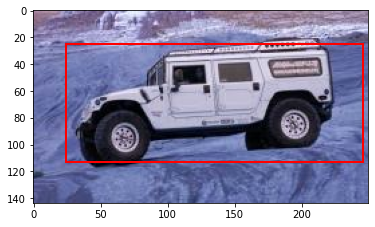

In [142]:
import matplotlib.patches as patches

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [143]:
# Define function to display predicted bounding box
def pred_bounding_box(image_indices):
  for im in image_indices:
    plt.figure(figsize=(15,12))
    filename = data_test.iloc[im, 1]
    unscaled = cv2.imread(filename)
    print(filename.split('/')[-2] + "/" + filename.split('/')[-1])
    image_height, image_width, _ = unscaled.shape
    image = cv2.resize(unscaled, (IMAGE_HEIGHT, IMAGE_WIDTH)) # Rescaled image to run the network
    feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
    region = model.predict(x=np.array([feat_scaled]))[0]
    x0 = int(region[0] * image_width / IMAGE_WIDTH) # Scale the BBox
    y0 = int(region[1] * image_height / IMAGE_HEIGHT)
    x1 = int((region[0] + region[2]) * image_width / IMAGE_WIDTH)
    y1 = int((region[1] + region[3]) * image_height / IMAGE_HEIGHT)
    fig,ax = plt.subplots(1)
    ax.imshow(unscaled)
    rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()

Audi RS 4 Convertible 2008/07735.jpg


<Figure size 1080x864 with 0 Axes>

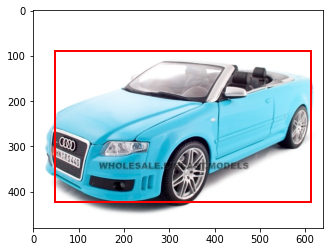

BMW 6 Series Convertible 2007/04221.jpg


<Figure size 1080x864 with 0 Axes>

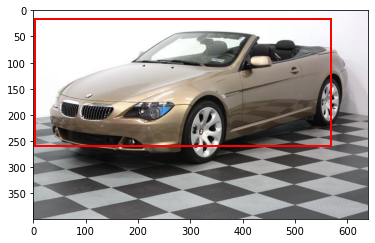

Mercedes-Benz S-Class Sedan 2012/06194.jpg


<Figure size 1080x864 with 0 Axes>

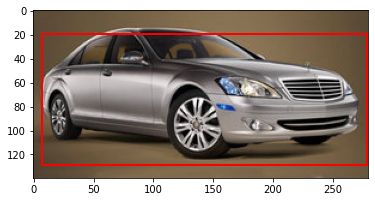

In [144]:
image_indices = [472,1234,6740]
pred_bounding_box(image_indices)


In [145]:
def plot_random_cars_with_bounding_box(car_makes, images_path, annotations):
  for car_make_idx in range(5):
      imageClass = random.randrange(0, len(car_makes_df))
      print(car_makes.iloc[imageClass].values[0])
      plt.figure(figsize=(15,12))
      for i in range(3):
        df = images_path[images_path["ImageClass"]==imageClass]
        if len(df) > 0:
          idx = random.randrange(0, len(df))
          plt.subplot(3, 3, i+1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          img = imread(df.iloc[idx].FullPath)
          ann = annotations[annotations["Image Name"] == df.iloc[idx]['Image Name']]
          x1,y1,x2,y2 = ann['Bounding Box coordinates'].values[0], ann['Unnamed: 2'].values[0], ann['Unnamed: 3'].values[0], ann['Unnamed: 4'].values[0]
          cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2) # add rectangle to image
          plt.imshow(img)
      plt.show()

# Combined Model

In [151]:
#os.chdir('/content/drive/MyDrive/Great Learning/Cap')

In [152]:
data_train = pd.merge(train_images_path, car_annotations_train, how='inner',on='Image Name')

In [153]:
data_train.head(5)

Image Name                                           FullPath  Image Class  \
0  00163.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
1  00462.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
2  00522.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
3  00707.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
4  00773.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   

   Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  Image class  
0                        46          84         661         428            1  
1                         5           8          83          58            1  
2                         6           7          94          68            1  
3                        26          32         677         418            1  
4                        33          50         197         150            1

In [154]:
print(data_train.shape)

(8103, 8)


In [155]:
# y_train = np.zeros((int(data_train.shape[0]), 4))
# X_train = np.zeros((int(data_train.shape[0]), Image_Size, Image_Size, 3))

# # Read image, its dimensions, BBox coords for train data

# for index, row in data_train.iterrows():
#   path = row.iloc[1]
#   x0 = int(row.iloc[3])
#   y0 = int(row.iloc[4])
#   x1 = int(row.iloc[5])
#   y1 = int(row.iloc[6])
#   with Image.open(path) as image:
#     image_width, image_height = image.size
#     img = cv2.resize(np.array(image), dsize = (Image_Size, Image_Size), interpolation = cv2.INTER_CUBIC)
#   try:
#     img = img[:, :, :3]
#   except:
#     continue
#   X_train[index] = preprocess_input(np.array(img, dtype = np.float32))

#   y_train[index, 0] = x0 * Image_Size / image_width                 # Normalize bounding box by image width
#   y_train[index, 1] = y0 * Image_Size / image_height                # Normalize bounding box by image height
#   y_train[index, 2] = (x1 - x0) * Image_Size / image_width          
#   y_train[index, 3] = (y1 - y0) * Image_Size / image_height  

In [156]:
# np.save('X_train.npy', X_train)
# np.save('y_train.npy', y_train)

In [157]:
y_train

array([[  8.41142857,  20.48      , 112.45714286,  83.87047619],
       [  7.52941176,  16.        , 117.45882353, 100.        ],
       [  8.17021277,  12.61971831, 119.82978723, 109.97183099],
       ...,
       [  9.75      ,  54.16105417,  73.875     ,  64.46852123],
       [  7.936     ,   2.82352941, 118.528     , 125.17647059],
       [ 22.08      ,  32.        ,  90.88      ,  79.57333333]])

In [158]:
print(X_train.shape)
print(y_train.shape)

(8103, 128, 128, 3)
(8103, 4)


In [159]:
data_test = pd.merge(test_images_path, car_annotations_test, how='inner',on='Image Name')

In [160]:
data_test.head(5)

Image Name                                           FullPath  Image Class  \
0  00076.jpg  Car Images/Test Images/AM General Hummer SUV 2...            1   
1  00457.jpg  Car Images/Test Images/AM General Hummer SUV 2...            1   
2  00684.jpg  Car Images/Test Images/AM General Hummer SUV 2...            1   
3  01117.jpg  Car Images/Test Images/AM General Hummer SUV 2...            1   
4  01167.jpg  Car Images/Test Images/AM General Hummer SUV 2...            1   

   Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  Image class  
0                        11          13          84          60            1  
1                        31          20         226         119            1  
2                       111          54         365         190            1  
3                        45          39         729         414            1  
4                        14          16         268         169            1

In [161]:
print(data_test.shape)

(8000, 8)


In [162]:
# y_test = np.zeros((int(data_test.shape[0]), 4))
# X_test = np.zeros((int(data_test.shape[0]), Image_Size, Image_Size, 3))

# # Read image, its dimensions, BBox coords for test data

# for index, row in data_test.iterrows():
#   path = row.iloc[1]
#   x0 = int(row.iloc[3])
#   y0 = int(row.iloc[4])
#   x1 = int(row.iloc[5])
#   y1 = int(row.iloc[6])
#   with Image.open(path) as image:
#     image_width, image_height = image.size
#     img = cv2.resize(np.array(image), dsize = (Image_Size, Image_Size), interpolation = cv2.INTER_CUBIC)
#   try:
#     img = img[:, :, :3]
#   except:
#     continue
#   X_test[index] = preprocess_input(np.array(img, dtype = np.float32))

#   y_test[index, 0] = x0 * Image_Size / image_width                 # Normalize bounding box by image width
#   y_test[index, 1] = y0 * Image_Size / image_height                # Normalize bounding box by image height
#   y_test[index, 2] = (x1 - x0) * Image_Size / image_width          
#   y_test[index, 3] = (y1 - y0) * Image_Size / image_height  

In [ ]:
data

In [163]:
print(X_test.shape)
print(y_test.shape)

(8000, 128, 128, 3)
(8000, 4)


In [164]:
# np.save('X_test.npy', X_test)
# np.save('y_test.npy', y_test)

In [165]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')

In [166]:
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [168]:
data_train.head()

Image Name                                           FullPath  Image Class  \
0  00163.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
1  00462.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
2  00522.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
3  00707.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   
4  00773.jpg  Car Images/Train Images/AM General Hummer SUV ...            1   

   Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  Image class  
0                        46          84         661         428            1  
1                         5           8          83          58            1  
2                         6           7          94          68            1  
3                        26          32         677         418            1  
4                        33          50         197         150            1

In [169]:
y_train_c = pd.get_dummies(data_train['Image Class'])
y_test_c = pd.get_dummies(data_test['Image Class'])
y_train_c = np.array(y_train_c)
y_test_c = np.array(y_test_c)
print(y_train_c.shape)
print(y_test_c.shape)

(8103, 195)
(8000, 195)


In [192]:
from tensorflow.keras.applications.mobilenet import MobileNet

base_model = MobileNet(input_shape=(128, 128, 3), include_top=False)

for layer in base_model.layers:
        layer.trainable = False

avg_pool = GlobalAveragePooling2D()(base_model.output)
flatten = Flatten()(base_model.output)

classifier = Dense(1024, activation='relu')(avg_pool)
classifier = Dense(512, activation='relu')(classifier)
classifier = Dense(195, activation='softmax', name='Class')(classifier)

bbox = Dense(4, activation='relu', name='BBox')(flatten)

MN_model = Model(inputs=base_model.input, outputs=[bbox, classifier])

MN_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_7[0][0]']                
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 32)   128         ['conv1[0][0]']                  
                                                                                                  
 conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['conv1_bn[0][0]']         

                                                                                                  
 conv_pw_5_relu (ReLU)          (None, 16, 16, 256)  0           ['conv_pw_5_bn[0][0]']           
                                                                                                  
 conv_pad_6 (ZeroPadding2D)     (None, 17, 17, 256)  0           ['conv_pw_5_relu[0][0]']         
                                                                                                  
 conv_dw_6 (DepthwiseConv2D)    (None, 8, 8, 256)    2304        ['conv_pad_6[0][0]']             
                                                                                                  
 conv_dw_6_bn (BatchNormalizati  (None, 8, 8, 256)   1024        ['conv_dw_6[0][0]']              
 on)                                                                                              
                                                                                                  
 conv_dw_6

                                                                                                  
 conv_pw_11_bn (BatchNormalizat  (None, 8, 8, 512)   2048        ['conv_pw_11[0][0]']             
 ion)                                                                                             
                                                                                                  
 conv_pw_11_relu (ReLU)         (None, 8, 8, 512)    0           ['conv_pw_11_bn[0][0]']          
                                                                                                  
 conv_pad_12 (ZeroPadding2D)    (None, 9, 9, 512)    0           ['conv_pw_11_relu[0][0]']        
                                                                                                  
 conv_dw_12 (DepthwiseConv2D)   (None, 4, 4, 512)    4608        ['conv_pad_12[0][0]']            
                                                                                                  
 conv_dw_1

In [294]:
import tensorflow as tf
tf.keras.utils.plot_model(MN_model, "Model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [194]:
MN_model.compile(optimizer='Adam', loss={'BBox':tf.keras.losses.MeanSquaredError(),'Class':tf.keras.losses.CategoricalCrossentropy()},
                 loss_weights={'BBox':0.5, 'Class':1.0}, metrics=['accuracy'])

In [195]:
y_train[0]
len(X_test[0])

128

In [196]:
history = MN_model.fit(X_train, {'BBox':y_train, 'Class':y_train_c}, epochs=Epochs, batch_size=Batch_Size,
                       validation_data=(X_test, {'BBox':y_test, 'Class':y_test_c}))

Epoch 1/10
254/254 [==============================] - 65s 252ms/step - loss: 93.6929 - BBox_loss: 178.1990 - Class_loss: 4.5935 - BBox_accuracy: 0.8721 - Class_accuracy: 0.0592 - val_loss: 28.9104 - val_BBox_loss: 50.1973 - val_Class_loss: 3.8118 - val_BBox_accuracy: 0.9140 - val_Class_accuracy: 0.1220
Epoch 2/10
254/254 [==============================] - 62s 245ms/step - loss: 21.5888 - BBox_loss: 36.9724 - Class_loss: 3.1026 - BBox_accuracy: 0.9311 - Class_accuracy: 0.2381 - val_loss: 24.6368 - val_BBox_loss: 42.9879 - val_Class_loss: 3.1429 - val_BBox_accuracy: 0.9251 - val_Class_accuracy: 0.2276
Epoch 3/10
254/254 [==============================] - 62s 245ms/step - loss: 15.9185 - BBox_loss: 27.3284 - Class_loss: 2.2543 - BBox_accuracy: 0.9398 - Class_accuracy: 0.4027 - val_loss: 23.1373 - val_BBox_loss: 40.4051 - val_Class_loss: 2.9348 - val_BBox_accuracy: 0.9276 - val_Class_accuracy: 0.2741
Epoch 4/10
254/254 [==============================] - 62s 245ms/step - loss: 12.5221 - BBo

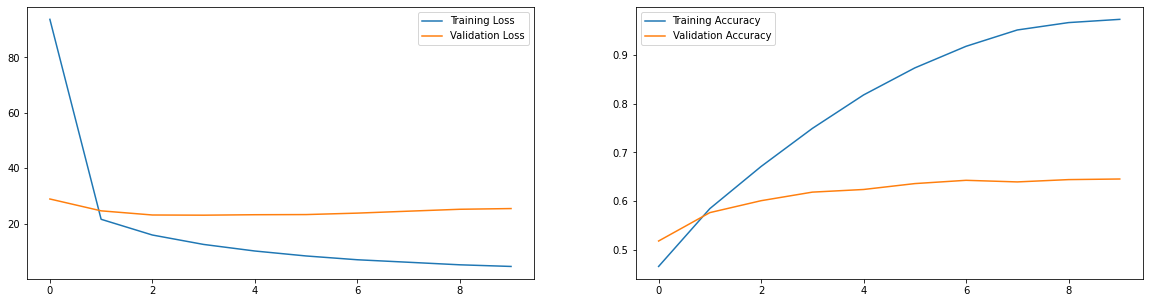

In [197]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot([sum(i)/2 for i in zip(history.history['BBox_accuracy'],history.history['Class_accuracy'])], label='Training Accuracy')
plt.plot([sum(i)/2 for i in zip(history.history['val_BBox_accuracy'],history.history['val_Class_accuracy'])], label='Validation Accuracy')
plt.legend()

In [207]:
model_json = MN_model.to_json()
with open("MN_model.json", "w") as file:
  file.write(model_json)

MN_model.save_weights("MN_model_weights.h5")

In [286]:
Image_Size = 128
from matplotlib import patches
def prediction(path):
  plt.figure(figsize=(15,12))
  
  unscaled = cv2.imread(path)
  image_height, image_width, _ = unscaled.shape
  image = cv2.resize(unscaled, (Image_Size, Image_Size))
  image = preprocess_input(np.array(image, dtype=np.float32))
  pred = MN_model.predict(np.expand_dims(image, axis=0))
  x0 = int(pred[0][0][0] * image_width / Image_Size)
  y0 = int(pred[0][0][1] * image_height / Image_Size)
  x1 = int((pred[0][0][0] + pred[0][0][2]) * image_width / Image_Size)
  y1 = int((pred[0][0][1] + pred[0][0][3]) * image_height / Image_Size)
  fig,ax = plt.subplots(1)
  ax.imshow(unscaled)
  rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

  print('True Class:', path.split('/')[-2])
  print('Predicted Class:', car_makes_df.iloc[np.argmax(pred[1][0])][0])

  plt.show()

True Class: Audi RS 4 Convertible 2008
Predicted Class: Audi RS 4 Convertible 2008


<Figure size 1080x864 with 0 Axes>

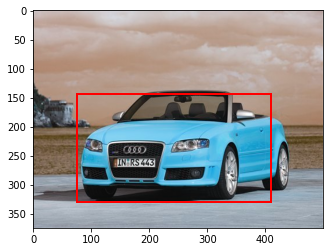

In [209]:
prediction(test_images_path.iloc[470,1])

True Class: AM General Hummer SUV 2000
Predicted Class: AM General Hummer SUV 2000


<Figure size 1080x864 with 0 Axes>

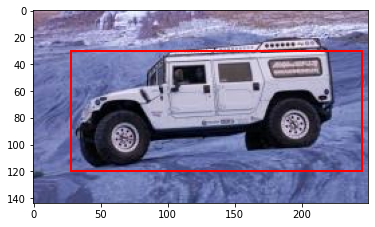

In [210]:
prediction(test_images_path.iloc[1,1])

True Class: Audi TT RS Coupe 2012
Predicted Class: Aston Martin V8 Vantage Convertible 2012


<Figure size 1080x864 with 0 Axes>

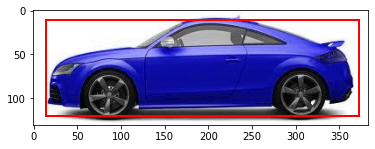

In [211]:
prediction(test_images_path.iloc[1000,1])

##MobileNet model load & Prediction

In [287]:
from tensorflow.keras.models import model_from_json

with open('MN_model.json', 'r') as f:
  model_json = f.read()

MN_model_full = model_from_json(model_json)
MN_model_full.load_weights('MN_model_weights.h5')

In [288]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from matplotlib import patches
def prediction(path):
  plt.figure(figsize=(15,12))
  
  unscaled = cv2.imread(path)
  image_height, image_width, _ = unscaled.shape
  image = cv2.resize(unscaled, (Image_Size, Image_Size))
  image = preprocess_input(np.array(image, dtype=np.float32))
  pred = MN_model_full.predict(np.expand_dims(image, axis=0))
  x0 = int(pred[0][0][0] * image_width / Image_Size)
  y0 = int(pred[0][0][1] * image_height / Image_Size)
  x1 = int((pred[0][0][0] + pred[0][0][2]) * image_width / Image_Size)
  y1 = int((pred[0][0][1] + pred[0][0][3]) * image_height / Image_Size)
  fig,ax = plt.subplots(1)
  ax.imshow(unscaled)
  rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

  print('True Class:', path.split('/')[-2])
  print('Predicted Class:', car_makes_df.iloc[np.argmax(pred[1][0])][0])

  plt.show()

True Class: AM General Hummer SUV 2000
Predicted Class: AM General Hummer SUV 2000


<Figure size 1080x864 with 0 Axes>

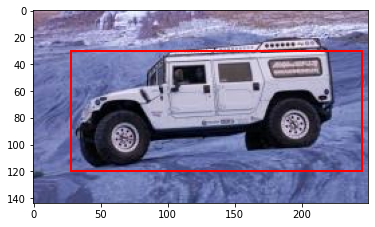

In [217]:
prediction(test_images_path.iloc[1,1])

True Class: Audi TT RS Coupe 2012
Predicted Class: Aston Martin V8 Vantage Convertible 2012


<Figure size 1080x864 with 0 Axes>

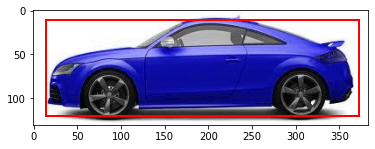

In [218]:
prediction(test_images_path.iloc[1000,1])

True Class: Audi RS 4 Convertible 2008
Predicted Class: Audi RS 4 Convertible 2008


<Figure size 1080x864 with 0 Axes>

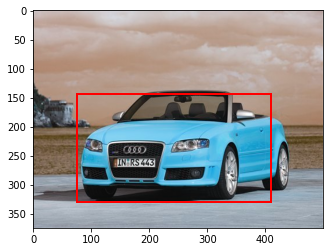

In [219]:
prediction(test_images_path.iloc[470,1])

#GUI

In [329]:
from tkinter import *
from tkinter import messagebox
from PIL import ImageTk,Image 
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo
from PIL import Image, ImageTk

model_selection_menu_options = [
    "MN_model"
]

window = Tk()
file_selected_text = StringVar()

def create_class_display(pre_window):
    image_paths = plot_random_cars(car_makes_df, train_images_path, True)
    class_names = list(image_paths.keys())
    print(class_names, class_names[0])
    
    #Class Label
    class_label_frame = Frame(pre_window)
    class_label = Label(class_label_frame, width=20, text="Class - Car Make/Model:", anchor='w')
    class_label.pack(side = LEFT, padx = 5 , pady = 5)

    def create_class_image():
        ip = image_paths[class_clicked.get()]
        print("Creating image for ", ip)
        img = Image.open(ip)
        width, height = img.size
        img = img.crop((0, 0, width, 300))
        img = ImageTk.PhotoImage(img)
        return img
    def on_change_class(*args):
        img = create_class_image()
        panel.configure(image=img)
        panel.image = img 
        
    class_clicked = StringVar()
    class_clicked.set( class_names[0] )
    class_clicked.trace("w", on_change_class)

    model_selection_menu = OptionMenu(class_label_frame , class_clicked , *class_names)
    model_selection_menu.pack(side = LEFT, padx = 5 , pady = 1)

    class_label_frame.pack(side = TOP, fill = X, padx = 5 , pady = 5)

    # Image for class
    class_frame = Frame(pre_window)
    img = create_class_image()
    panel = Label(class_frame, image=img)
    panel.image = img
    panel.pack()
    class_frame.pack(side = TOP, fill = X, padx = 5 , pady = 5)
    
def create_bounding_box_display(pre_window):
    print("bounding box....")
    image_paths = plot_random_cars_with_bounding_box(car_makes_df, train_images_path, car_annotations_train, True)
    class_names = list(image_paths.keys())
    print(class_names, class_names[0])
    
    #Class Label
    class_frame = Frame(pre_window)
    class_label = Label(class_frame, width=20, text="Bounding Box Car Make/Model:", anchor='w')
    class_label.pack(side = LEFT, padx = 5 , pady = 5)

    def create_class_image():
        ip = image_paths[class_clicked.get()]
        print("Creating image for ", ip)
        img = Image.open(ip)
        width, height = img.size
        img = img.crop((0, 0, width, 300))
        img = ImageTk.PhotoImage(img)
        return img
    def on_change_class(*args):
        img = create_class_image()
        panel.configure(image=img)
        panel.image = img 
        
    class_clicked = StringVar()
    class_clicked.set( class_names[0] )
    class_clicked.trace("w", on_change_class)

    model_selection_menu = OptionMenu(class_frame , class_clicked , *class_names)
    model_selection_menu.pack(side = LEFT, padx = 5 , pady = 1)

    class_frame.pack(side = TOP, fill = X, padx = 5 , pady = 5)

    # Image for class
    img = create_class_image()
    panel = Label(pre_window, image=img)
    panel.image = img
    panel.pack()


def load_and_preprocess():
   
    pre_window = Toplevel()
    pre_window.title("Car detection - Preprocess Window")
    
    create_class_display(pre_window)
    create_bounding_box_display(pre_window)
    
    pre_window.geometry("1000x800")
    pre_window.mainloop()
    
def predict_selected():
 #   prediction(file_selected_text.get())
    pass

# def image_browse():
#     pre_window = Toplevel()
#     pre_window.title('selected image')
#     filetypes = (('image files', '*.jpg'),
#         ('All files', '*.*')
#     )

#     file_name = fd.askopenfilename( title = 'select an image',filetypes = filetypes)
#     #showinfo(title= 'selected image', message = file_name)
#     #file_selected_text = file_name
#     img=Image.open(file_name)
#     img_resized=img.resize((128,128)) # new width & height
#     img=ImageTk.PhotoImage(img_resized)
#     b2 =Button(pre_window,image=img) # using Button 
#     b2.grid(row=4,column=2)
def image_browse1():
    #img_window = Toplevel()
    filetypes = (
        ('Image Files', '*.jpg'),
        ('All files', '*.*')
    )

    filename = fd.askopenfilename(
                title='Open a file',
                filetypes=filetypes
            )
    print(filename)
    img = ImageTk.PhotoImage(Image.open(filename))
    print(img)
    Label(
        window,
        image=img
    ).pack()
    file_selected_text.set(filename)
    #img_window.geometry("500x500")
    #img_window.mainloop()




C:/trials/Capstone project/Car Images/Train Images/Audi A5 Coupe 2012/00548.jpg
pyimage46
True Class: Audi A5 Coupe 2012
Predicted Class: Audi A5 Coupe 2012


<Figure size 1080x864 with 0 Axes>

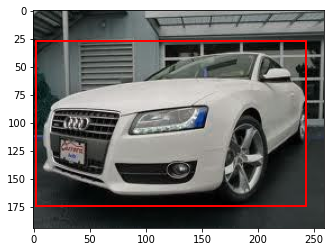

C:/trials/Capstone project/Car Images/Train Images/Chevrolet Silverado 1500 Hybrid Crew Cab 2012/00536.jpg
pyimage47
True Class: Chevrolet Silverado 1500 Hybrid Crew Cab 2012
Predicted Class: Chevrolet Silverado 1500 Hybrid Crew Cab 2012


<Figure size 1080x864 with 0 Axes>

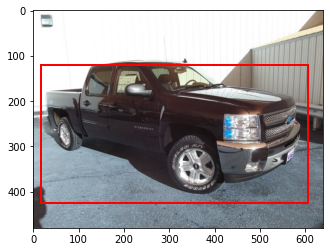

BMW 1 Series Convertible 2012


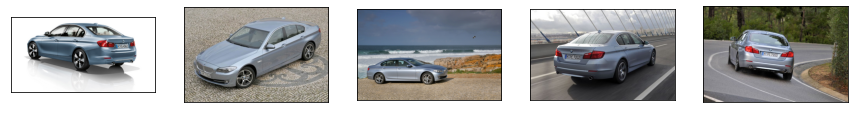

Audi S5 Convertible 2012


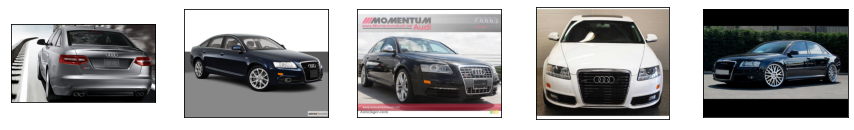

Audi A5 Coupe 2012


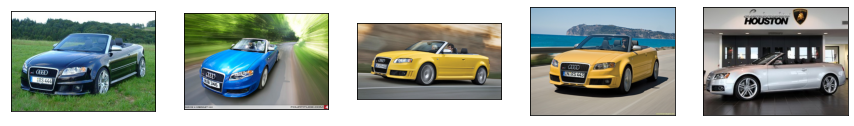

MINI Cooper Roadster Convertible 2012


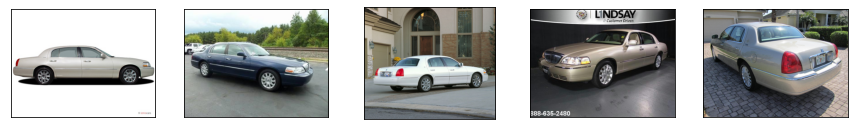

Jeep Grand Cherokee SUV 2012


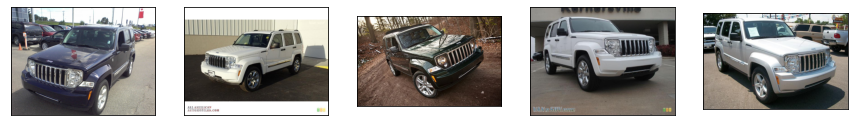

['BMW 1 Series Convertible 2012', 'Audi S5 Convertible 2012', 'Audi A5 Coupe 2012', 'MINI Cooper Roadster Convertible 2012', 'Jeep Grand Cherokee SUV 2012'] BMW 1 Series Convertible 2012
Creating image for  26_class.png
bounding box....


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ssdrive\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\ssdrive\AppData\Local\Temp\ipykernel_2080\1309829527.py", line 101, in load_and_preprocess
    create_bounding_box_display(pre_window)
  File "C:\Users\ssdrive\AppData\Local\Temp\ipykernel_2080\1309829527.py", line 57, in create_bounding_box_display
    image_paths = plot_random_cars_with_bounding_box(car_makes_df, train_images_path, car_annotations_train, True)
TypeError: plot_random_cars_with_bounding_box() takes 3 positional arguments but 4 were given


Creating image for  156_class.png
True Class: Chevrolet Silverado 1500 Hybrid Crew Cab 2012
Predicted Class: Chevrolet Silverado 1500 Hybrid Crew Cab 2012


<Figure size 1080x864 with 0 Axes>

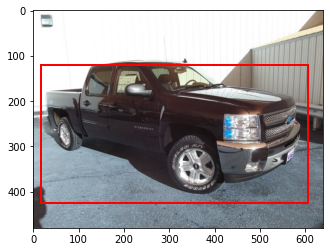

In [ ]:
#window = Tk()
def show_gui():
    #window = Tk()
    window.title("Car detection - Capstone Project - CV2 - Group 2.ipynb")

    #ROW 1
    row1 = Frame(window)
    load_preprocess_label = Label(row1, width=20, text="Load Data and Preprocess:", anchor='w')
    load_preprocess_label.pack(side = LEFT, padx = 5 , pady = 5)

    load_preprocess_button = Button(row1, width=20, text = 'Import Data', command=load_and_preprocess)
    load_preprocess_button.pack(side = LEFT, padx = 5 , pady = 1)

    load_preprocess_status_text = StringVar()
    load_preprocess_status_label = Label(
        row1, width=40, textvariable=load_preprocess_status_text, bg="white", anchor='w'
    )
    load_preprocess_status_label.pack(side = LEFT)

    row1.pack(side = TOP, fill = X, padx = 5 , pady = 5)

    #ROW 2
    row2 = Frame(window)
    model_selection_label = Label(row2, width=20, text="Select Models: ", anchor='w')
    model_selection_label.pack(side = LEFT, padx = 5 , pady = 5)

    menu_clicked = StringVar()
    menu_clicked.set( "SELECT" )

    model_selection_menu = OptionMenu(row2 , menu_clicked , *model_selection_menu_options)
    model_selection_menu.pack(side = LEFT, padx = 5 , pady = 1)

    row2.pack(side = TOP, fill = X, padx = 5 , pady = 5)

    #ROW 3
    
    def image_browse_local():
        #img_window = Toplevel()
        filetypes = (
            ('Image Files', '*.jpg'),
            ('All files', '*.*')
        )

        filename = fd.askopenfilename(
                    title='Open a file',
                    filetypes=filetypes
                )
        #print(filename)
        img = ImageTk.PhotoImage(Image.open(filename))
        #print(img)
        lbl = Label(
            window,
            image=img
        )
        lbl.pack()
        file_selected_text.set(filename)
        #img_window.geometry("500x500")
        #img_window.mainloop()

    
    row3 = Frame(window)
    image_predict_label = Label(row3, width=20, text="Select an Image to predict: ", anchor='w')
    image_predict_label.pack(side = LEFT, padx = 5 , pady = 5)

   # file_selected_text = StringVar()
    file_selected_text_label = Label(
        row3, width=40, textvariable=file_selected_text, bg="white", anchor='w'
    )
    file_selected_text_label.pack(side = LEFT, padx = 5 , pady = 5)

    file_select_button = Button(row3, width=10, text = 'Browse', command=image_browse1)
    file_select_button.pack(side = LEFT)

    row3.pack(side = TOP, fill = X, padx = 5 , pady = 5)

    #ROW 4
    def predict_image():
        prediction(file_selected_text.get())
         
    row4 = Frame(window)
    image_predict_button = Button(row4, width=10, text = 'Predict', command=predict_image)
    image_predict_button.pack(side = LEFT)

    row4.pack(side = TOP, fill = X, padx = 350 , pady = 5)

    #ROW 5
    row5 = Frame(window)
    predicted_class_label = Label(row5, width=20, text="Predict Class: ", anchor='w')
    predicted_class_label.pack(side = LEFT, padx = 5 , pady = 5)

    predicted_class_text = StringVar()
    predicted_class_label_text = Label(
        row5, width=40, textvariable=predicted_class_text, bg="white", anchor='w'
    )
    predicted_class_label_text.pack(side = LEFT, padx = 5 , pady = 5)
    row5.pack(side = TOP, fill = X, padx = 5 , pady = 5)


    #ROW 6
    row6 = Frame(window)
    predicted_bounding_box_label = Label(row6, width=20, text="Predict Bounding Box: ", anchor='w')
    predicted_bounding_box_label.pack(side = LEFT, padx = 5 , pady = 5)


    row6.pack(side = TOP, fill = X, padx = 5 , pady = 5)


    window.geometry("800x270")
    window.mainloop()
show_gui()